In [ ]:
#CCA=>complete case analysis
#df=misssing data = filter missing data
#new_df=fitered_column_in_which_we_have_missing_data

#new_df=missing data drop
#architecture=  histogram
#past column in which we have missing data
#update column in which we have no missing data

#if past data architacture is overlap to new architcture
#if means we drop missing data

#if past data architacture is not overlap to new architcture
##if means we can not drop missing data.we will fill missing data


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("/content/dsjob - dsjob.csv")

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [ ]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [ ]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1953,no_enrollment,Masters,>20,1
1830,no_enrollment,Graduate,10,>4
1552,no_enrollment,Graduate,2,2
2119,Full time course,High School,8,never
686,Full time course,High School,5,1


In [ ]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [ ]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [ ]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [ ]:
import matplotlib.pyplot as plt


<Axes: >

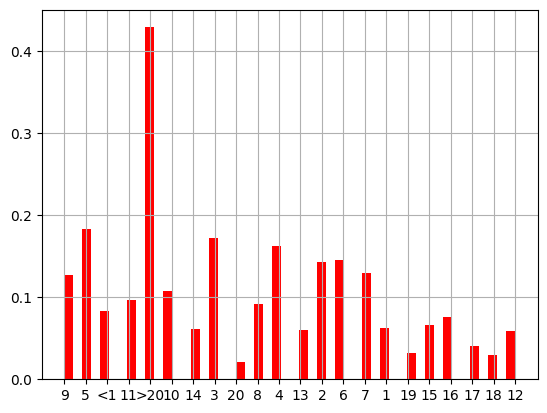

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
#new_df['experience'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: >

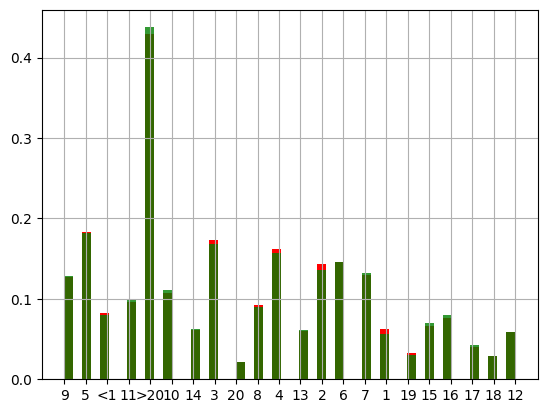

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
new_df['experience'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [ ]:
c=pd.read_csv("/content/covid_toy - covid_toy.csv")

In [ ]:
c

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [ ]:
cols=[var for var in c.columns if c[var].isnull().mean()<0.5 and c[var].isnull().mean()>0]
cols

['fever']

In [ ]:
c[cols].sample(5)

,fever
73,98.0
78,100.0
45,99.0
60,102.0
29,NaN


In [ ]:
len(c[cols].dropna())/len(c)

0.9

In [ ]:
new_c=c[cols].dropna()
c.shape,new_c.shape

((100, 6), (90, 1))

<Axes: >

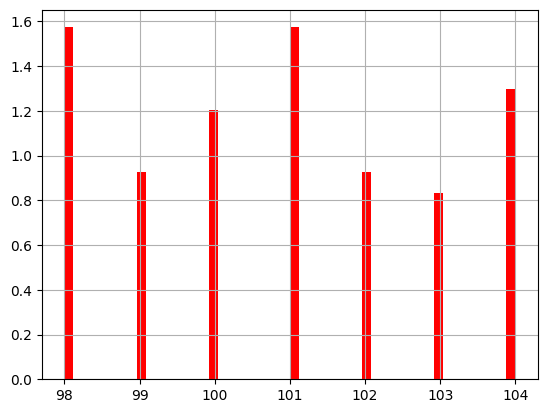

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
c['fever'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
#new_c['fever'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: >

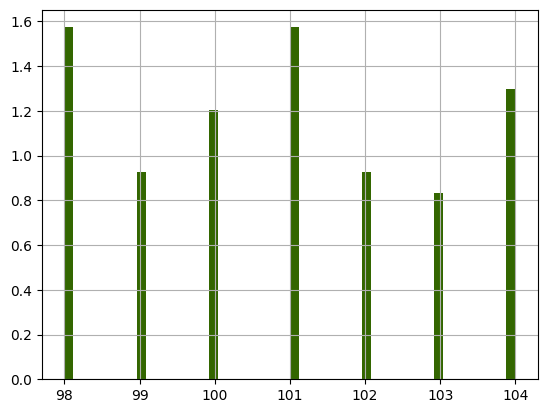

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
c['fever'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
new_c['fever'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [ ]:
t=pd.read_csv("/content/titanic - titanic.csv")

In [ ]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
t.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [ ]:
cols=[var for var in t.columns if t[var].isnull().mean()<0.25 and t[var].isnull().mean()>0]
cols

['Age', 'Fare']

In [ ]:
t[cols].sample(5)

,Age,Fare
201,0.33,14.4000
167,18.00,34.3750
124,NaN,7.7500
226,23.00,7.7958
87,18.00,8.0500


In [ ]:
len(t[cols].dropna())/len(c)

3.31

In [ ]:
new_t=t[cols].dropna()
t.shape,new_t.shape

((418, 12), (331, 2))

<Axes: >

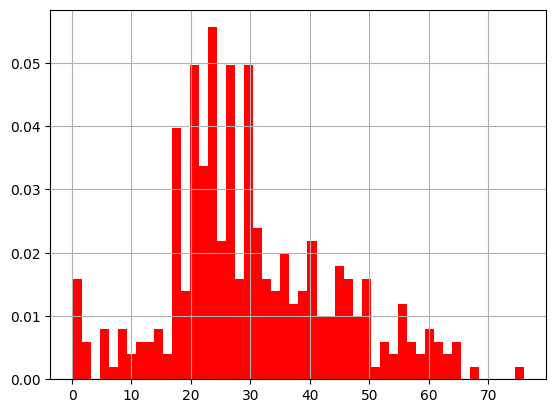

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
t['Age'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
#new_t['Age'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: >

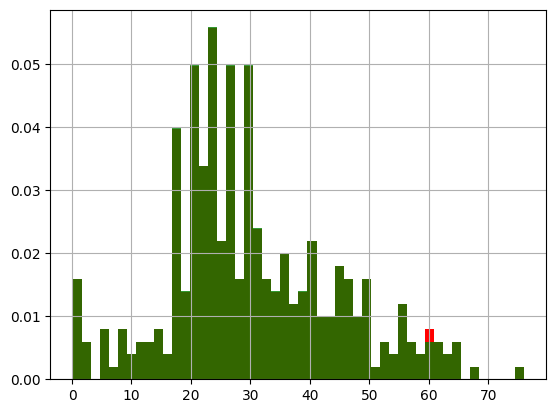

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
t['Age'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
new_t['Age'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [ ]:
cols=[var for var in t.columns if t[var].isnull().mean()<0.3 and t[var].isnull().mean()>0]
cols

['Age', 'Fare']

<Axes: >

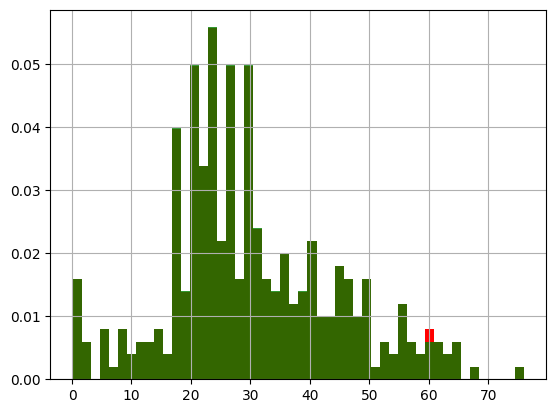

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#ordinal data
t['Age'].hist(bins=50,ax=ax,density=True,color='red')
#data offer cca , the argument alpha makes the color transport ,sowe can
#see the overlay of the 2 distribution
new_t['Age'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)